# Demo of the LAMINAR package

In [1]:
import LAMINAR

import torch
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

In [12]:
# make moon dataset

X, _ = make_moons(n_samples=2500, noise=0.1)

# add a third dimension of gaussian noise
#X = np.concatenate([X, np.random.randn(2500, 1)], axis=1)

# make a tensor
data = torch.tensor(X, dtype=torch.float32)
data.shape

torch.Size([2500, 2])

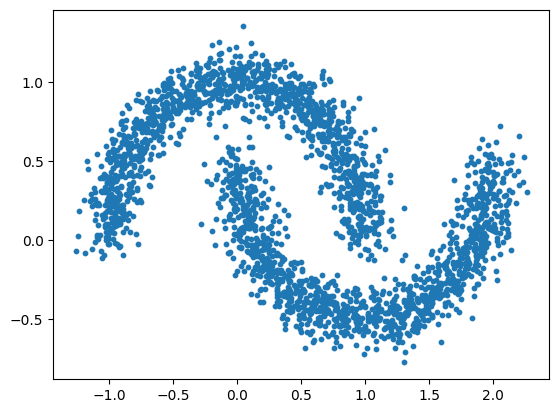

In [13]:
# visualize the dataset

plt.scatter(X[:, 0], X[:, 1], s=10);

In [14]:
# initialize the LAM class

hyperparameters = {
    'hidden_dim': 32,
    'width': 64,
    'timesteps': 50,
    'learning_rate': 5e-3,
    'patience': 1,
    'p_lim': 0.5,
    'batch_size': 128,
}

LAM = LAMINAR.LAMINAR(data, epochs=500, k_neighbours=25, hyperparameters=hyperparameters)

LAM.p_value()

Epoch 197 | Loss: 1.0553 | p-value: 6.87E-01:  39%|███▉      | 196/500 [21:56<34:02,  6.72s/it]


Early stopping at epoch 197
Henze-Zirkler p-value:	0.687414453281745


0.687414453281745

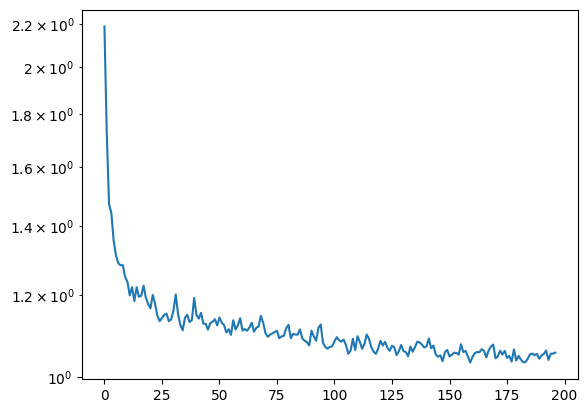

In [15]:
plt.plot(LAM.loss_history)
plt.yscale('log')

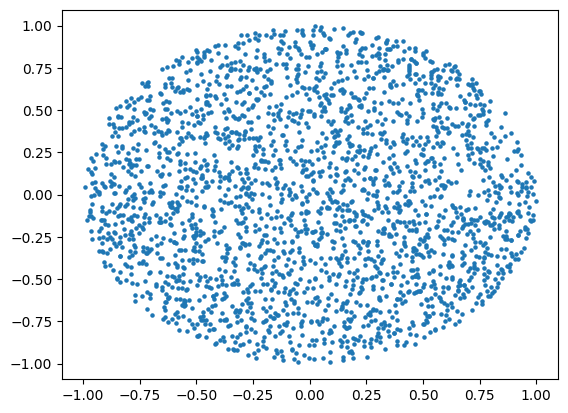

In [16]:
# visualize the pushed data
plt.scatter(LAM.data_pushed[:, 0], LAM.data_pushed[:, 1], s=5);

In [17]:
# default nearest neighbours of point with index 0
LAM.query(0)

([array([   0, 2185, 1341,  916, 1611, 2493, 2353,  506,  342, 1129,  845,
          384, 1890,   55,  623, 2044, 2297, 1287, 1081, 1459, 1698, 2424,
          607,  893, 1275], dtype=int64)],
 [array([0.        , 0.00025653, 0.00052645, 0.0007286 , 0.00080518,
         0.00084763, 0.00085153, 0.00087712, 0.00094428, 0.00094992,
         0.0009592 , 0.00109023, 0.00121494, 0.00135179, 0.00138323,
         0.00141722, 0.00144733, 0.0015674 , 0.00164443, 0.00170028,
         0.00172378, 0.00173825, 0.00197261, 0.00201283, 0.0020484 ])])

In [18]:
# query the 5 nearest neighbours of the points [0, 2, 5]
LAM.query(np.array([0, 2, 5]) , k_neighbours=5)

([array([   0, 2185, 1341,  916, 1611], dtype=int64),
  array([   2, 1433, 1945, 1704,  323], dtype=int64),
  array([   5, 2437, 2298, 1795, 1251], dtype=int64)],
 [array([0.        , 0.00025653, 0.00052645, 0.0007286 , 0.00080518]),
  array([0.        , 0.00019115, 0.00041026, 0.00063554, 0.0010012 ]),
  array([0.        , 0.00016894, 0.000574  , 0.00097553, 0.0010617 ])])

In [19]:
# calculate the distance between the points 0 and 5
dist, path = LAM.distance(0, 5, return_path=True)
print(dist)

0.04793238590355031


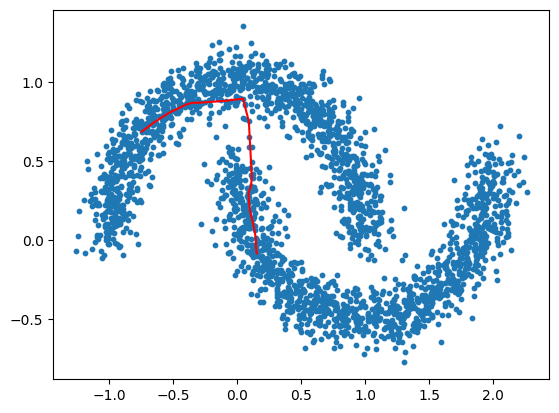

In [20]:
#plot data, and the shortest path between the points 0 and 5
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.plot(X[path, 0], X[path, 1], 'r')
plt.show()

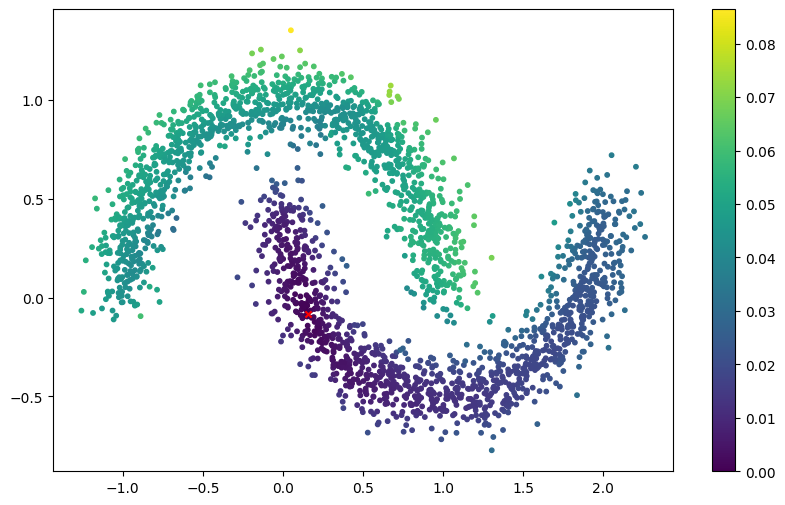

In [21]:
# calculate the distance to all points from the point 0 and plot

start_point = 0

dist = LAM.distance(start_point)

fig, ax = plt.subplots(figsize=(10, 6))

plot = ax.scatter(X[:, 0], X[:, 1], c=dist, cmap='viridis', s=10, vmin=0, vmax=dist.max())
ax.scatter(X[start_point, 0], X[start_point, 1], c='r', s=20, marker='x')
plt.colorbar(plot)
plt.show()
